# Previous X

doubly linked lists with chains as nextlink and chains as previouslink of length n (user specified)

![previous x anim](res/previousxanim.gif)

so lets just write it procedurally with a next x list that we keep track of

task:   
running while loop populating list with random integers  
every two seconds scrape the last 20 of the running list    
do this 10 times  
save that to a bar chart for animation sequence  



# The Random Scope

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

random_list = []
go = True
all_last_twentys = []

start_time = time.time()
i = 0
while go:
    # add random number
    random_list.append(np.random.randint(0,100))

    # calculate how much time has passed since loop started
    elapsed_time = time.time() - start_time

    # every 2 seconds scrape the last 20 of the list
    # every 2 seconds reset 2 seconds counter
    # every time we reset 2 seconds counter, we increment i and stop at i == 10
    if elapsed_time > 2:
        start_time = time.time()
        i += 1

        # every 2 seconds get the last 20 of the list
        all_last_twentys.append(random_list[-20:])
    if i == 10:
        go = False

In [2]:
len(all_last_twentys)

10

In [3]:
# name the file sequentially
i = 0
n = 20
for last_twenty in all_last_twentys:
    x_axis = [i for i in range(n)]
    plt.title("last twenty")
    plt.bar(x_axis, last_twenty)
    plt.savefig(f"res/last_twenty_frames/image_{i}.png")
    plt.close()
    # update file name
    i += 1

gemini code to convert image frames to animation

In [4]:
import cv2
import os
import re

def create_mp4_from_images(image_folder, output_path, fps=30, image_pattern=r"image_\d+\.png"):
    """
    Creates an MP4 video from a sequence of images in a folder.

    Args:
        image_folder (str): The path to the folder containing the images.
        output_path (str): The path to the output MP4 video file.
        fps (int, optional): The frames per second of the output video. Defaults to 30.
        image_pattern (str, optional): A regular expression pattern to match image filenames.
            Defaults to "image_\\d+\\.png", which matches files like "image_001.png", "image_123.png", etc.
            Use raw strings (r"pattern") to avoid issues with backslashes in regex patterns.
    """
    images = [img for img in os.listdir(image_folder) if re.search(image_pattern, img)]
    # Sort the images.  Important for correct video sequence.
    images.sort()  # Simple sort, might need more robust sorting for complex filenames

    if not images:
        print(f"Error: No images found in the folder matching the pattern '{image_pattern}'.  Folder: {image_folder}")
        return

    # Determine the frame size from the first image.
    first_image_path = os.path.join(image_folder, images[0])
    img = cv2.imread(first_image_path)
    if img is None:
        print(f"Error: Could not read the first image: {first_image_path}.  Check if the path is correct and the image is valid.")
        return
    height, width, channels = img.shape

    # Define the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Write each image to the video.
    for image in images:
        image_path = os.path.join(image_folder, image)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image {image_path}. Skipping this frame.")
            continue  # Skip to the next image
        out.write(img)

    # Release the video writer.
    out.release()
    print(f"Successfully created video: {output_path} from images in {image_folder}")

def main():
    """
    Main function to run the image-to-video conversion.
    """
    # Example usage:
    image_folder = "res/last_twenty_frames"  # Replace with the path to your image folder
    output_path = "output.mp4"  # Replace with the desired output path
    fps = 0.5  # You can change the frames per second
    image_pattern = r"image_\d+\.png" # Example pattern, change as needed

    # Create a dummy image folder and images if it doesn't exist
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)
        for i in range(10):  # Create 10 dummy images
            import numpy as np
            dummy_image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) # Create a random image
            cv2.imwrite(os.path.join(image_folder, f"image_{i:03d}.png"), dummy_image) # save the image

    create_mp4_from_images(image_folder, output_path, fps, image_pattern)



if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'cv2'

# display the time based animation of the distribution of random numbers being populated by grabbing the last twenty every 2 seconds

please see output.mp4



[output](output.mp4)

# Okay
# So how do we create this in a class centric way?


well i think we can take our doublylinked class and modify it a little  

if we convert the nextlink and previouslink connectors from the link class of our doublylinked list into chains themselves of length n
we can easily pull out the data of the last x  

so multiple ways to do this including the procedural way i just did above but we want a class oriented way to do it


so lets work on adding previousn and nextn links to our doubly linked list class

# Here is our doublylinkedlist class and usage using the numbers 1 through 5

In [ ]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item

In [ ]:
dl_list = llist()

dl_list.add_item(1)
dl_list.add_item(2)
dl_list.add_item(3)
dl_list.add_item(4)
dl_list.add_item(5)

negative_list = [-i for i in range(1, 6)]
negative_list = [-1,-2,-3,-4,-5]

# 1 based negative indexing
for item in negative_list:
    print(dl_list.get_item(item))

In [ ]:
dl_list = llist()

dl_list.add_item(1)
dl_list.add_item(2)
dl_list.add_item(3)
dl_list.add_item(4)
dl_list.add_item(5)

# 0 based positive indexing
for i in range(dl_list.length):
    print(dl_list.get_item(i))

In [ ]:
# please see the demo animation in readme, 
# doubly linked lists just wire up the previous link before resetting the endlink tape which you can see
# here ^

<hr>

convert this implementation to use chains for its next and previous connections of length n (n specified by user)


well maybe a static previous n and next n is bad and we should only care about in the moment previous, in that case we dont have to change our doubly linked class at all as you can see in our for loops we are using dl_list to iterate through the whole list

if we just use the already implemented negative indexing and a constrained for loop we can already do any node of slicing starting from the n

here is an example of the outputs above

lets get the last 3

In [ ]:
# print the whole list
for i in range(dl_list.length):
    print(dl_list.get_item(i))

okay use negative indexing to only get the last 3

In [ ]:
last_n = 3
for i in range(1, last_n+1):
    print(dl_list.get_item(-i))

right?

so whats the problem with this?  

well this is an iterative approach the previous x are not known  

n has to be counted to as you can see in the for loop above  

as n grows large, the number of counts grows large, and your program slows down  


so we need to keep going  



So whats the current TODO:

In [ ]:
# TODO: implement python slicing
# mostly care about negative slicing
# negative slicing already works in a user defined for loop using the negative indexing
# built into get_index and a for loop to iterate through last n as you can see again by the duplicate cell above that i've coppied beneath this todo

In [ ]:
last_n = 3
for i in range(1, last_n+1):
    print(dl_list.get_item(-i))

okay so rewrite todo for when i come back for further touches

# TODO: mf just build python list slicing but dont make it count up to n every god damn time and thats it (into doubly linked lists)

In [ ]:
# TODO: mf just build python list slicing but dont make it count up to n every god damn time and thats it (into doubly linked lists)

# Okay lets add some notes

![1](res/handwritten-NOTES-slicing-copy/1.jpg)

![2](res/handwritten-NOTES-slicing-copy/2.jpg)

![3](res/handwritten-NOTES-slicing-copy/3.jpg)

![4](res/handwritten-NOTES-slicing-copy/4.jpg)

![5](res/handwritten-NOTES-slicing-copy/5.jpg)

![6](res/handwritten-NOTES-slicing-copy/6.jpg)

So whats this mean??


we ALREADY HAVE SLICING BUILT IN by having the get_index function of our chain classes able to use negative indexing  

what we really need to do is keep a running track of slices that have already been requested  



* getting the last 3 above is an indication of slicing
* if we keep a running track through lists of lists we can keep ourselves from recounting if the count can be lower than the list length

what i mean is basically we need to add a new member variable to our chain class  
we have self.firstlink  
self.nextlink  
self.previouslink  
self.endlink  

LEAVE THESE THE SAME


add a new self.slice_receipts  

basically slice receipts will be a list of lists of previous subsets of our main chain  

so whenever a slice is requested that we havent counted yet, we count it, and save it to the slice_receipt keyring  
(this is a list of list or a chain of chains)

at each slice we check our saved slices  

if we already counted that slice we just return it  

if we havent we can count from the beginning or use a modification of another subset already counted to perform the slice faster


so whats a good way to preserve this:

Here is mine:

at each slice we ask:

* Where did you start?
* What direction did yougo?
* how long did you go in that direction?

example we already counted and saved a slice of the last 8,000,000 in the list  
okay now user requesting a slice of the last 8,001,000

okay its actually quicker to count to 1000 than 8,001,000

so we can create a duplicate of the 8,000,000 slice in our already counted keyring

(the first elements of this list are)  
index 0: where did you start?
index 1: which direction did you go? negative or positive
index 2: how long did you go in that direction?
index 3 to end is the actual subset


This gives an example of how we can count once never count again and even use previous counts to speed up things we actually have not counted


all we have to do is add a list of lists called slice somethings that checks three things before counting again:

what is our slice list? do we have any? if no then have to count first time
if yes we check to see if our preserved slices are the same or close to what the user is asking

we then use logical stepage to count less than the full amount if its quicker to modify a previous slice than to build a new one entirely

again we then save the newely created subset as a list into slice receipts or something (name up to you)

again slicereceipt is a list of lists where each list represents a previous slice

the first index -> where did the slice start  
the next index -> which direction did you go +, or -?  
the next index -> how far did you go in that direction?
the next index to end of list is actually the subset  

right?

so basically what do we need to do:


# TODO: take doublylinkedlist class and add explicit ability to slice (we already see it has it using a for loop) merge for loop into actual class function so we can just call slice

# TODO: keep running track of slices so if we can count less or not count again we do!

That's it i think

okay so start with adding slice to doubly linked lists below

In [5]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item
            

In [6]:
dl_list = llist()

dl_list.add_item(1)
dl_list.add_item(2)
dl_list.add_item(3)
dl_list.add_item(4)
dl_list.add_item(5)

negative_list = [-i for i in range(1, 6)]
negative_list = [-1,-2,-3,-4,-5]

# 1 based negative indexing
for item in negative_list:
    print(dl_list.get_item(item))

5
4
3
2
1


In [7]:
# show slicing already works, but we are recounting everytime
start = -1
end = -3
number_steps = 3
# this will grab the last 3 elements if we loop it
for i in range(1, number_steps+1):
    print(dl_list.get_item(-i))

print('we just sliced the last 3')

5
4
3
we just sliced the last 3


In [8]:
# okay do a medium slice
# slice from -2 to -5:
for i in range(3, 6):
    print(dl_list.get_item(-i))

3
2
1


In [9]:
# ^ this returning a reversed list showing negative direction where python would be 

#dl_list[-5:-2]
#and would actually print
dl_pythonlist = [1, 2, 3, 4, 5]
dl_pythonlist[-5:-2]


[1, 2, 3]

In [10]:
# so that shows we need some modifications there too

# anyways just add this as logic to our class and we fix it later

In [11]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item

    def slice(self, start, end):
        chain = llist()
        for i in range(start, end):
            chain.add_item(self.get_item(i))
        return chain

In [12]:
my_list = llist()
my_list.add_item(1)
my_list.add_item(2)
my_list.add_item(3)
my_list.add_item(4)
my_list.add_item(5)

for i in range(my_list.length):
    print(my_list.get_item(i))

1
2
3
4
5


In [13]:
sliced = my_list.slice(0, 2)
sliced.length

2

In [14]:
current_slice_item = sliced.firstitem
print(current_slice_item.list_item)
current_slice_item = current_slice_item.next_list_item
print(current_slice_item.list_item)
current_slice_item = current_slice_item.next_list_item
print(current_slice_item)

1
2
None


In [15]:
# ^ that is slicing, we just need to add logic to speed it up because this implementation makes us recount EVERY TIME and tbh
# every time we use slicing it is paternistic
# so again, we need to add previous slice receipts and logic of when to append to previous slices or cut from previous slices instead of recounting
# so slicing already done, we just need to stop ourselves from recounting everytime with a slice receipts member variable in the chain class
# this will just be a list of lists containing previous slices and their subsets
# again with:
# index 1 where did the slice start
# index 2 which direction did the slice go
# index 3 how long did the slice go in that direction
# index 4 to end: the actual subset created by the slice


okay so real quick 

how do we get the pythonic way to do negative indexing??

you just run it through twice actually its weird

so check this out

In [16]:
mylist = [i for i in range(5)]
print("so a list of 1 through 5 zero starting")
mylist

so a list of 1 through 5 zero starting


[0, 1, 2, 3, 4]

In [17]:
right

NameError: name 'right' is not defined

so if we do negative indexing for the last 5 items in python slice it looks like this it should print out 0 through 4

##### 

In [18]:
mylist[-5:]

[0, 1, 2, 3, 4]

In [19]:
right

NameError: name 'right' is not defined

okay lets use the ll class to build a list and check out its negative indexing

In [42]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item

    def slice(self, start, end):
        chain = llist()
        for i in range(start, end):
            chain.add_item(self.get_item(i))
        return chain

In [57]:


my_list = llist()
my_list.add_item(1)
my_list.add_item(2)
my_list.add_item(3)
my_list.add_item(4)
my_list.add_item(5)

for i in range(my_list.length):
    print(my_list.get_item(i))

1
2
3
4
5


okay what if we do negative indexing like python lists do

In [44]:
my_list = llist()
my_list.add_item(1)
my_list.add_item(2)
my_list.add_item(3)
my_list.add_item(4)
my_list.add_item(5)

# this represents the last 5 using negative indexing in our ll class
for i in range(my_list.length):
    print(my_list.get_item(-i))

1
5
4
3
2


okay so whoops what did i do

In [45]:
for i in range(my_list.length):
    print(i)

0
1
2
3
4


In [46]:
print('we tried to use negative indexing in our ll class starting from 0')
print('we actually need these values')
[-i for i in range(1, 6)]

we tried to use negative indexing in our ll class starting from 0
we actually need these values


[-1, -2, -3, -4, -5]

^ these represent the negative last five indexes of our doublylinked list class right

In [47]:
print('okay so lets build the correct negative indexing for loop for our ll class')

okay so lets build the correct negative indexing for loop for our ll class


In [48]:
for i in range(1, 6):
    print(-i)

-1
-2
-3
-4
-5


There we go okay so now lets use it in get index

In [49]:
for i in range(1, my_list.length+1):
    print(my_list.get_item(-i))

5
4
3
2
1


okay so we now have the last 5 items cool! but it retururned it unpythonic

we dont want descending order we want ascending order

ex: 1, 2, 3, 4, 5 not 5, 4, 3, 2, 1

so what can we do??


well we pass it through negative indexing twice
check this out

In [50]:
checkthisout = llist()
for i in range(1, my_list.length+1):
    checkthisout.add_item(my_list.get_item(-i))
for i in range(1, checkthisout.length+1):
    print(checkthisout.get_item(-i))

1
2
3
4
5


^ by using another chain for the returned negative indexing and then negative indexing that returned chain again we get ascending order of the list

In [51]:
[i for i in range(1, 6)][-5:]

[1, 2, 3, 4, 5]

In [54]:
import time
start = time.time()
n = 80000000
my_list = []
for i in range(n):
    my_list.append(i)
end = time.time() - start
print(my_list[-1])
print(end)

79999999
11.728687763214111


In [55]:
import time
start = time.time()
n = 8000000
my_list = llist()
for i in range(n):
    my_list.add_item(i)
end = time.time() - start
print(my_list.get_item(-1))
print(end)

7999999
22.25156807899475


print('+=0n')

okay so at a certain level of length n chain it may be actually beneficial to store the next n data in a new chain

how do we find this:

TODO: find chain n max length in terms of speed

# What Length of chain does data population and reading start to slow down at?

hey lets add some white space in between chunks

<hr>

okay

# What Length of chain does data population and reading start to slow down at?

okay so what do we need to do?

well

we need to set some parameters for a first resolutional look at data chain length bottlenecks, right?

okay

so a good idea would be:

at what size have you noticed chains taking a long time?

okay so maybe that would be around eight million


okay so lets add some walls to it


lets create a few chains and time their creation and data access from first link to last link right

so like this

chain 1 length 5 million, just 0 through 4999999 right

time its creation

continue to time its data access starting at index 0

stop the timer when index 0 has been accessed 

okay now go to your next chain length

now maybe we go up 3 million. etc

do that a few times with the right parameter settings and you'll find the elbow curve

<hr>

okay save notes and continue

okay so lets redefine the ll class so its in view and we dont have to scroll and if we need to modify it we can

In [58]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item

    def slice(self, start, end):
        chain = llist()
        for i in range(start, end):
            chain.add_item(self.get_item(i))
        return chain

my_list = llist()
my_list.add_item(1)
my_list.add_item(2)
my_list.add_item(3)
my_list.add_item(4)
my_list.add_item(5)

for i in range(my_list.length):
    print(my_list.get_item(i))

1
2
3
4
5


In [98]:
length_chain = llist()
for i in range(1, 12):
    length_chain.add_item(10**i*10)
for i in range(length_chain.length):
    print(length_chain.get_item(i))

parallel_timer_chain = llist()

100
1000
10000
100000
1000000
10000000
100000000
1000000000
10000000000
100000000000
1000000000000


In [ ]:
import time
for i in range(length_chain.length):
    current_length = length_chain.get_item(i)
    start = time.time()
    timed_chain = llist()
    for i in range(current_length):
        timed_chain.add_item(i)
    # for i in range(current_length):
    #     x = timed_chain.get_item(i)
    parallel_timer_chain.add_item(time.time() - start)

okay so now we have a parallel length chain and timer chain that shows time in seconds
lets convert that to time in minutes


In [93]:
minute_timer_chain = llist()
for i in range(parallel_timer_chain.length):
    minute_timer_chain.add_item(parallel_timer_chain.get_item(i)/60)
for i in range(minute_timer_chain.length):
    print(minute_timer_chain.get_item(0))

2.11795171101888e-06
2.11795171101888e-06
2.11795171101888e-06
2.11795171101888e-06
2.11795171101888e-06


In [94]:
# again the length chain and minute timer chain are parallel and indexes coorelate to eachother
for i in range(length_chain.length):
    print(length_chain.get_item(i))

100
1000
10000
100000
1000000


In [95]:
length_chain.length == minute_timer_chain.length

True

okay so now we need to plot them

plotlibrary uses python lists so we need to convert our chains

In [96]:
lengthlist = [length_chain.get_item(i) for i in range(length_chain.length)]
minutelist = [minute_timer_chain.get_item(i) for i in range(minute_timer_chain.length)]

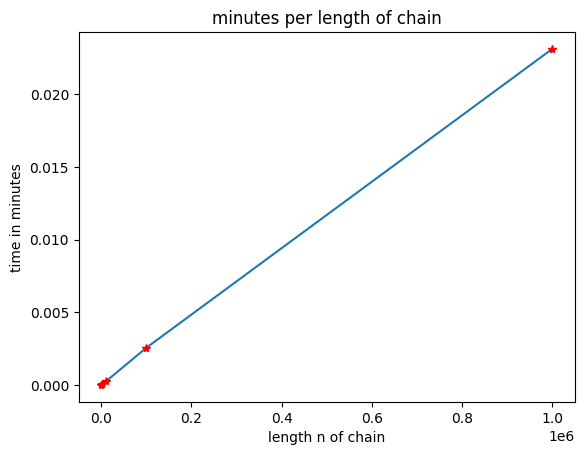

In [97]:
plt.title("minutes per length of chain")
plt.plot(lengthlist, minutelist, label='time per chain creation and access of length n')
plt.plot(lengthlist, minutelist, 'r*')
plt.xlabel('length n of chain')
plt.ylabel('time in minutes')
plt.show()

In [87]:
test = llist()
n = 8000000
for i in range(n):
    test.add_item(n)

In [90]:
for i in range(n-1):
    test.get_item(i)

KeyboardInterrupt: 

hey dont worry about the errors here but check this out

so if you think about the looping through a list every loop and every call to get index starts from the firstlink again

we need some logic that says hey we are incrementing looping and in that state we shall preserve another member variable that says loop pointer, this way in the next iteration we do not count from the beginning, that is just data access however and we are still on data storage speed issues